# Analizing Videos' Details of Red Bull Batalla de Gallos' Youtube Channel

> This is a EDA applied to data from a Youtube Channel.

- toc: true 
- badges: true
- comments: true
- categories: [EDA,Python,Pandas,Data Analysis]
- image: images/chart-preview.png

## TL;DR 🤓

This project's aim is to perform some common EDA tasks on the created dataset containing information of all International Matches of Freestyle organized by Red Bull from 2015 to 2020 (filtered by `internacional` and ` vs ` keywords). **Red Bull Batalla de los Gallos** is the Most Recognized **Freestyle Competition in Spanish** that brings together the **16 winning Freestylers** from the competitions organized by Red Bull in each country. After all matches only one of them is crowned as international champion [Click here to learn more](https://rap.fandom.com/es/wiki/Red_Bull_Batalla_de_los_Gallos)

## Importing Libraries ✔️

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

from datetime import datetime

# check Pandas' version
pd.__version__

'1.3.5'

## Customized Settings 🎨

In [ ]:
g=[]

def customPlotSettings(graph=g, figW=6.4, figH=5, XorY=plt.yticks([])):
    g.fig.set_figwidth(figW)
    g.fig.set_figheight(figH)

    ax=g.facet_axis(0,0)

    for p in ax.patches:
        height = p.get_height() # height of each horizontal bar is the same
        width = p.get_width()
        ax.text(p.get_x() + (width / 2),
                height * 1.03, # # y-coordinate position of data label, padded to be in the middle of the bar,
                height, # f'{(height / 1000 ):.0f}K',
                ha='center'
                )
        
    # Remove frame (or all the spines at the same time)
    ax.set_frame_on(False)

    custom_params = {
                     'axes.titlesize':16,
                     'ytick.left': False,
                     'axes.titlepad': 20 
                    }

    sns.set_theme(style='white', palette='Set2', font_scale=1.1 , rc=custom_params)
    XorY

In [3]:
def customHistSettings(figW=6.4):
    fig, ax = plt.subplots()
    custom_params = {
                     'figure.figsize':(figW,5),
                     'axes.titlesize':16,
                     'ytick.left': False
                    }
    sns.set_theme(style='white', palette='Set2', rc=custom_params)

    ax.grid(axis ='x', color ='0.95') 
    ax.set_frame_on(False)
    plt.yticks([])

## Importing dataset 🗃️

In [4]:
data_url = 'https://raw.githubusercontent.com/mrenrique/EDA-to-Youtube-Channel-Videos/main/clean_data.csv'
data = pd.read_csv(data_url, index_col='id')

# show first three rows
data.sample(3)

,title,views,year,length,likes,dislikes
id,,,,,,
66,VALLEST vs CIUDADANO,1101081,2016,00:04:49,11418,311
19,VALLES-T vs CHANG - Octavos | Red Bull Interna...,11477492,2019,00:06:43,161561,2969
59,ACZINO vs. CHOQUE,3219531,2017,00:04:26,30950,4455


## Exploratory Data Analysis 💡

Let's take a look at the datafame's properties for a better understanding to know what needs to be done. To do so, we can use the `info()` method which gives us the number of columns, **columns names** and their **data types** all together.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     92 non-null     object
 1   views     92 non-null     int64 
 2   year      92 non-null     int64 
 3   length    92 non-null     object
 4   likes     92 non-null     int64 
 5   dislikes  92 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 5.0+ KB


In [6]:
data.shape

print("The Dataset has", data.shape[0],"rows with", data.shape[1],"features")

The Dataset has 92 rows with 6 features


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
views,92.0,4.773642e+06,8.383880e+06,47082.0,661099.50,1715757.0,4372855.00,44005544.0
year,92.0,2.017609e+03,1.670405e+00,2015.0,2016.00,2018.0,2019.00,2020.0
likes,92.0,6.649529e+04,1.203502e+05,1510.0,9971.25,29532.5,59178.00,729024.0
dislikes,92.0,8.634130e+03,2.347569e+04,55.0,607.00,1645.0,5667.75,194847.0


In [8]:
data.nunique()

title       88
views       92
year         6
length      77
likes       92
dislikes    92
dtype: int64

## Data Pre-processing 🧼

In [9]:
data['length'] = pd.to_datetime(data['length'], format="%H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     92 non-null     object        
 1   views     92 non-null     int64         
 2   year      92 non-null     int64         
 3   length    92 non-null     datetime64[ns]
 4   likes     92 non-null     int64         
 5   dislikes  92 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 5.0+ KB


In [10]:
# https://note.nkmk.me/en/python-str-replace-translate-re-sub/
data['title'] = [i.replace('VALLEST', 'VALLES-T').replace('VALLES T', 'VALLES-T') for i in data['title']]
# data['title'].head()
data['title'][data['title'].str.contains('VALLES')]

id
10    BNET vs VALLES-T - Octavos | Red Bull Internac...
17    BNET vs VALLES-T - Final | Red Bull Internacio...
19    VALLES-T vs CHANG - Octavos | Red Bull Interna...
25    VALLES-T vs JOKKER - Cuartos | Red Bull Intern...
30    VALLES-T vs ACZINO - Semifinal | Red Bull Inte...
35                              VALLES-T vs PEPE GRILLO
38                                     VALLES-T vs BNET
40                                      VALLES-T vs KDT
46                                      VALLES-T vs WOS
66                                VALLES-T vs CIUDADANO
72                                     JOTA vs VALLES-T
Name: title, dtype: object

## Feature Engineering 🏗️

In [84]:
# https://stackoverflow.com/questions/40705480/python-pandas-remove-everything-after-a-delimiter-in-a-string
data['Freestyler_A'] = [i.replace('.', '').lower().split(' vs ')[0].strip().title() for i in data['title']]
data['Freestyler_B'] = [i.replace('.', '').split(' -')[0].lower().split(' vs ')[-1].strip().title() for i in data['title']]

#Moving the columns position
data.columns.tolist()

data = data[['title', 'Freestyler_A', 'Freestyler_B', 'views', 'year', 'length', 'likes', 'dislikes']]

data.sample(5)

,title,Freestyler_A,Freestyler_B,views,year,length,likes,dislikes
id,,,,,,,,
23,JOKKER vs LITZEN,Jokker,Litzen,2546416,2019,1900-01-01 00:09:46,40625,900
53,SKONE vs. JOTA MC,Skone,Jota Mc,1980963,2017,1900-01-01 00:00:14,21721,9927
68,JONY BELTRAN vs CHUTY,Jony Beltran,Chuty,13138438,2016,1900-01-01 00:07:09,182494,11726
40,VALLES-T vs KDT,Valles-T,Kdt,1858540,2018,1900-01-01 00:07:50,33888,877
7,SKONE vs RAPDER,Skone,Rapder,1651540,2020,1900-01-01 00:15:19,64965,3259


## Let's Analyze each Feature
Univariate Analysis

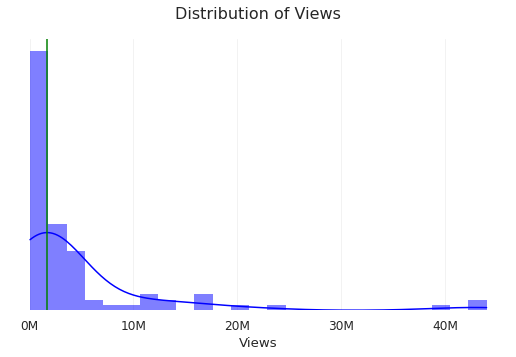

In [ ]:
customHistSettings(figW=9)

g=sns.histplot(data.views, bins=25, kde=True, stat='density', linewidth=0, color='blue')
plt.xlabel('Views')
plt.title('Distribution of Views')

xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/(1000000)]
g.set_xticklabels(xlabels)

#Plooting the median
mean = data.views.median()
mean
plt.axvline(mean, 0, 1, color='green')

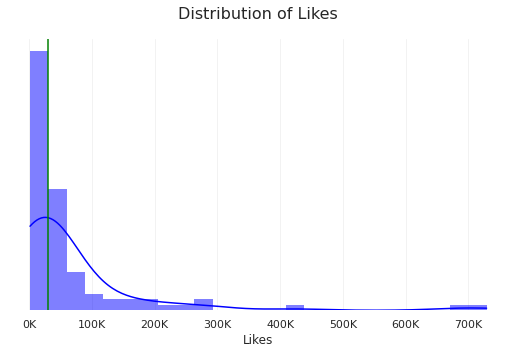

In [ ]:
customHistSettings(figW=9)

g=sns.histplot(data.likes, bins=25, kde=True, stat='density', linewidth=0, color='blue')
plt.xlabel('Likes')
plt.title('Distribution of Likes')

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

#Plooting the median
mean = data.likes.median()
mean
plt.axvline(mean, 0, 1, color='green')

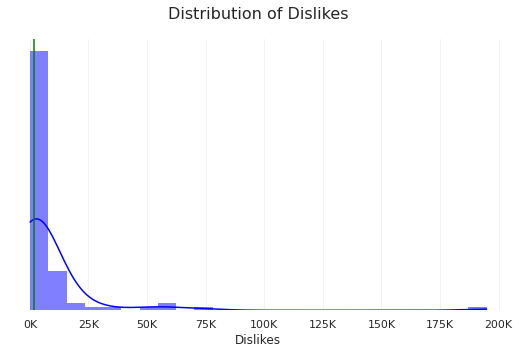

In [ ]:
customHistSettings(figW=9)

g=sns.histplot(data.dislikes, bins=25, kde=True, stat='density', linewidth=0, color='blue')
plt.xlabel('Dislikes')
plt.title('Distribution of Dislikes')

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

#Plooting the median
mean = data.dislikes.median()
mean
plt.axvline(mean, 0, 1, color='green')

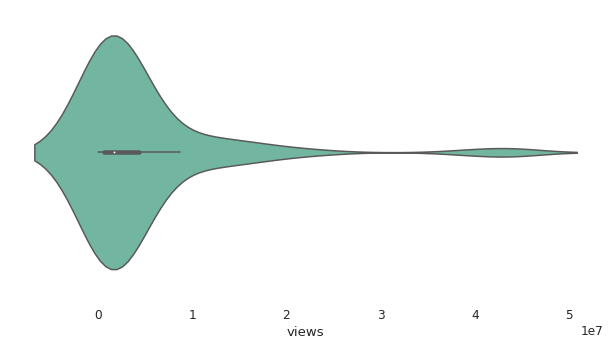

In [ ]:
g=sns.catplot(data=data, x='views', kind='violin')
customPlotSettings(figW=9)
# g.fig.set_figwidth(8)
# g.fig.set_figheight(4)

Text(0.5, 1.0, 'Number of Videos by Year')

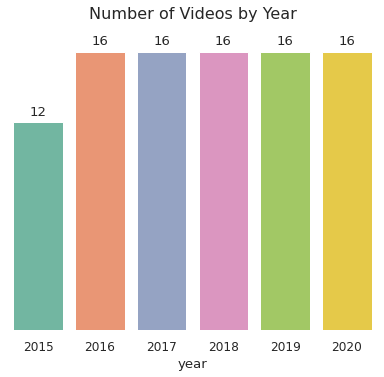

In [134]:
g = sns.catplot(data=data, x='year', kind='count')
customPlotSettings(XorY=plt.yticks([]))
g.set(ylabel=None)

plt.title('Number of Videos by Year')

In [116]:
F_concated = pd.concat([data['Freestyler_A'], data['Freestyler_B']])
F_concated.value_counts()

Aczino       21
Arkano       14
Valles-T     11
Skone        10
Bnet         10
             ..
Yeriko        1
Rvs           1
Dozer         1
Redencion     1
Mrjunior      1
Length: 62, dtype: int64

Text(0.5, 1.0, 'Numbers of Appereances By each Freestyler in any International from 2015 to 2020')

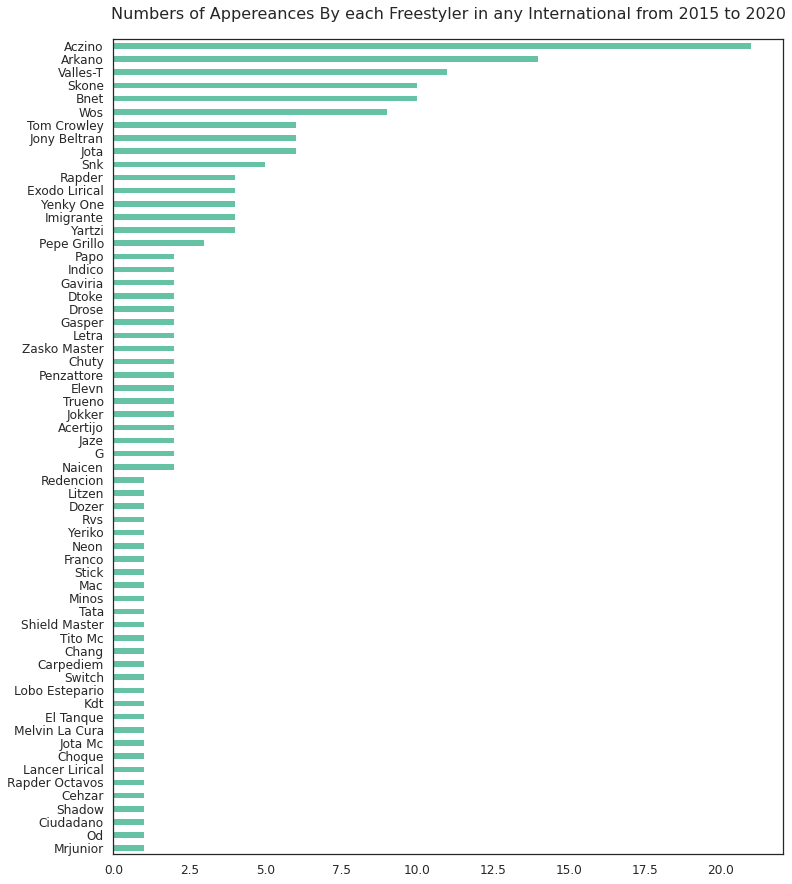

In [127]:
F_concated.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(12, 15))

g.set(xlabel=None)
g.set(ylabel=None)

plt.title('Numbers of Appereances By each Freestyler in any International from 2015 to 2020')

In [ ]:
sirve pa otra grafica
# data.groupby(['year','Freestyler A']).size()
# data.groupby(['Freestyler A','year']).size().groupby(level=1).max()

In [ ]:
data[data['title'].str.contains('SNK')]

,id,title,Freestyler A,Freestyler B,views,year,length,likes,dislikes
14,14,NAICEN vs SNK,Naicen,Snk,66128,2020,00:06:44,3196,200
22,22,JAZE vs SNK,Jaze,Snk,1407134,2019,00:07:06,28687,890
24,24,SNK vs ZASKO MASTER,Snk,Zasko Master,588253,2019,00:06:02,14385,583
26,26,SNK vs ACZINO,Snk,Aczino,1204854,2019,00:06:58,24243,473
27,27,SNK vs BNET,Snk,Bnet,2154417,2019,00:09:01,40675,1061




---



In [ ]:
data[data['year'] == '2018']
# do the same
data[data['year'].eq('2018')]

# show all rows but not of this years
data[~data['year'].eq('2018') & data['title'].str.find(' vs ')]

In [ ]:
years = [2018, 2017]
data[data['year'].isin(years)]

Correlation between Numerical Features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


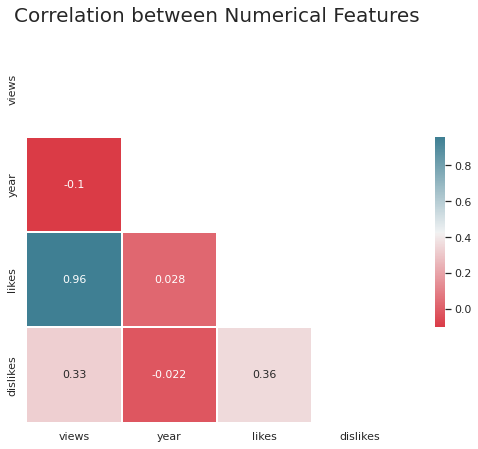

In [ ]:
# Calculate correlation between each pair of variable
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Insert a figure
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask
ax = sns.heatmap(corr,
                 mask=mask,
                 cmap=cmap,
                 annot=True,
                 annot_kws= {'size':11},
                 square=True, xticklabels=True,
                 yticklabels=True,
                 linewidths=.5,
                 cbar_kws={'shrink': .5},
                 ax=ax
                )
ax.set_title('Correlation between Numerical Features', fontsize=20);

In [ ]:
https://www.python-graph-gallery.com/341-python-gapminder-animation